In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.family'] ='Malgun Gothic'
warnings.filterwarnings("ignore")

In [ ]:
s1 = '''0         투기과열지구    0.409555
1           투기지역    0.120883
2      중학교_학업성취도    0.099997
3       세대당_주차대수    0.050248
4           건축년도    0.042612
5      간접역세권_노선수    0.037672
6         직주_근접도    0.035859
7            세대수    0.033822
8            용적률    0.023493
9         전용면적구간    0.020704
10        조정대상지구    0.019763
11           건폐율    0.018307
12     백화점쇼핑몰_유무    0.018079
13      중학교_최단거리    0.017974
14       학원가_근접도    0.014381
15      스타벅스_매장수    0.007774
16  고속철_직접역세권_여부    0.007358
17        임대세대비율    0.005376
18           건설사    0.005137
19   초등학교_최단거리구간    0.003370
20     직접역세권_노선수    0.003165
21         마트_유무    0.002901
22          현관구조    0.001571'''

s2='''0           투기지역    0.303882
1         투기과열지구    0.224985
2      중학교_학업성취도    0.101540
3       세대당_주차대수    0.048959
4         직주_근접도    0.036127
5         조정대상지구    0.035822
6           건축년도    0.035563
7      백화점쇼핑몰_유무    0.028598
8      간접역세권_노선수    0.027993
9            세대수    0.023085
10           용적률    0.022709
11      중학교_최단거리    0.019588
12           건폐율    0.018548
13        전용면적구간    0.018281
14       학원가_근접도    0.012929
15        임대세대비율    0.010017
16      스타벅스_매장수    0.009489
17  고속철_직접역세권_여부    0.005933
18   초등학교_최단거리구간    0.003720
19     직접역세권_노선수    0.003616
20           건설사    0.003433
21         마트_유무    0.003274
22          현관구조    0.001908'''

s3='''0      간접역세권_노선수    0.304223
1      중학교_학업성취도    0.135834
2         직주_근접도    0.100163
3       세대당_주차대수    0.086806
4           건축년도    0.056469
5            용적률    0.040427
6            세대수    0.038104
7       중학교_최단거리    0.030713
8         임대세대비율    0.029161
9        학원가_근접도    0.027900
10     백화점쇼핑몰_유무    0.025251
11           건폐율    0.024503
12  고속철_직접역세권_여부    0.022159
13      스타벅스_매장수    0.022017
14           건설사    0.016689
15        전용면적구간    0.016385
16         마트_유무    0.008606
17   초등학교_최단거리구간    0.006803
18     직접역세권_노선수    0.004466
19          현관구조    0.003320
20        조정대상지구    0.000000
21          투기지역    0.000000
22        투기과열지구    0.000000'''

In [ ]:
t1,t2,t3=map(lambda x: pd.DataFrame(np.array([s for i,s in enumerate(x.split()) if i%3]).reshape(-1,2)), [s1,s2,s3])
t=t1.merge(t2,on=0).merge(t3,on=0)
q=['21 3Q', '22 3Q', '23 3Q']
t.columns=['feature']+q
t[q]=t[q].astype(float)
t

,feature,21 3Q,22 3Q,23 3Q
0,투기과열지구,0.409555,0.224985,0.000000
1,투기지역,0.120883,0.303882,0.000000
2,중학교_학업성취도,0.099997,0.101540,0.135834
3,세대당_주차대수,0.050248,0.048959,0.086806
4,건축년도,0.042612,0.035563,0.056469
5,간접역세권_노선수,0.037672,0.027993,0.304223
6,직주_근접도,0.035859,0.036127,0.100163
7,세대수,0.033822,0.023085,0.038104
8,용적률,0.023493,0.022709,0.040427
9,전용면적구간,0.020704,0.018281,0.016385


''

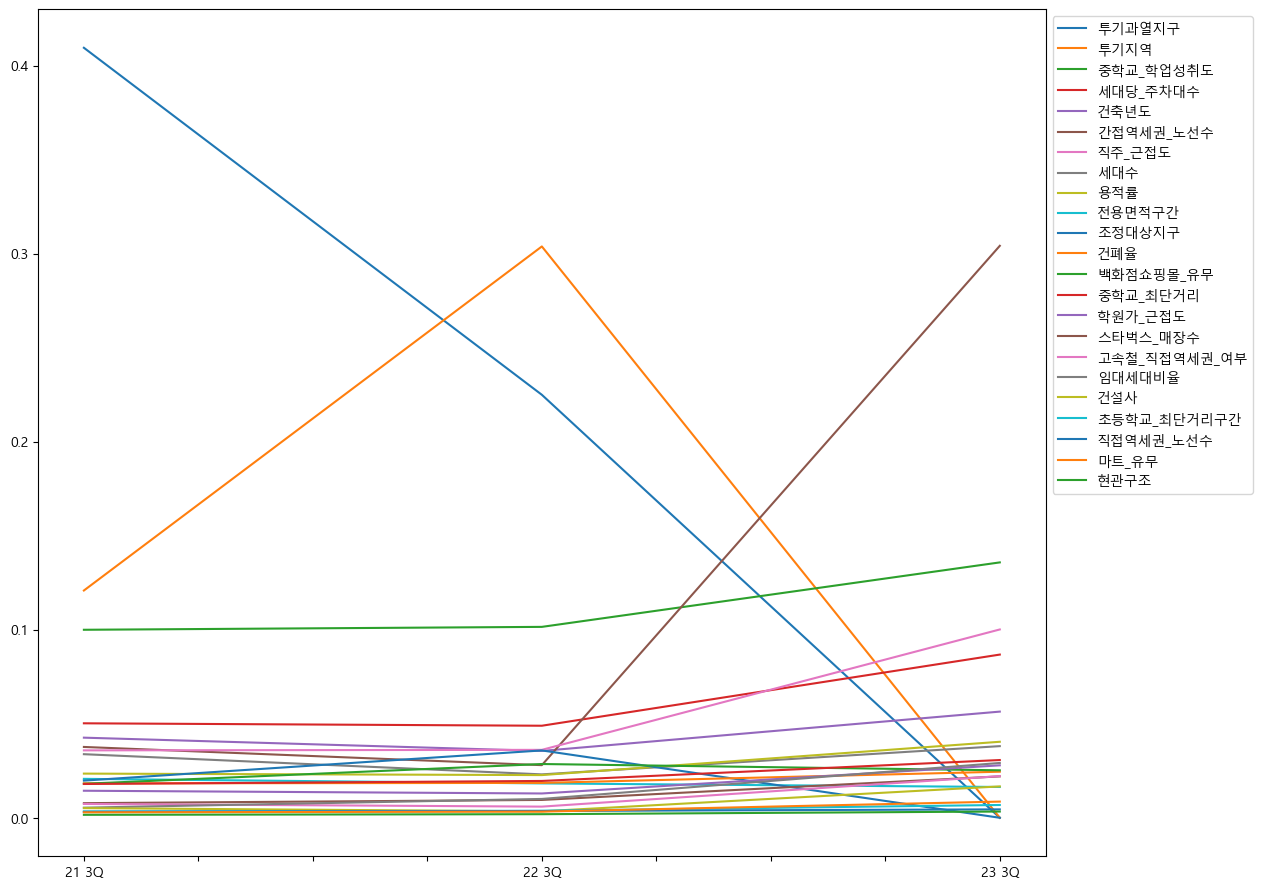

In [ ]:
fig,ax=plt.subplots(figsize=(13,11))
t.set_index('feature').T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
;

''

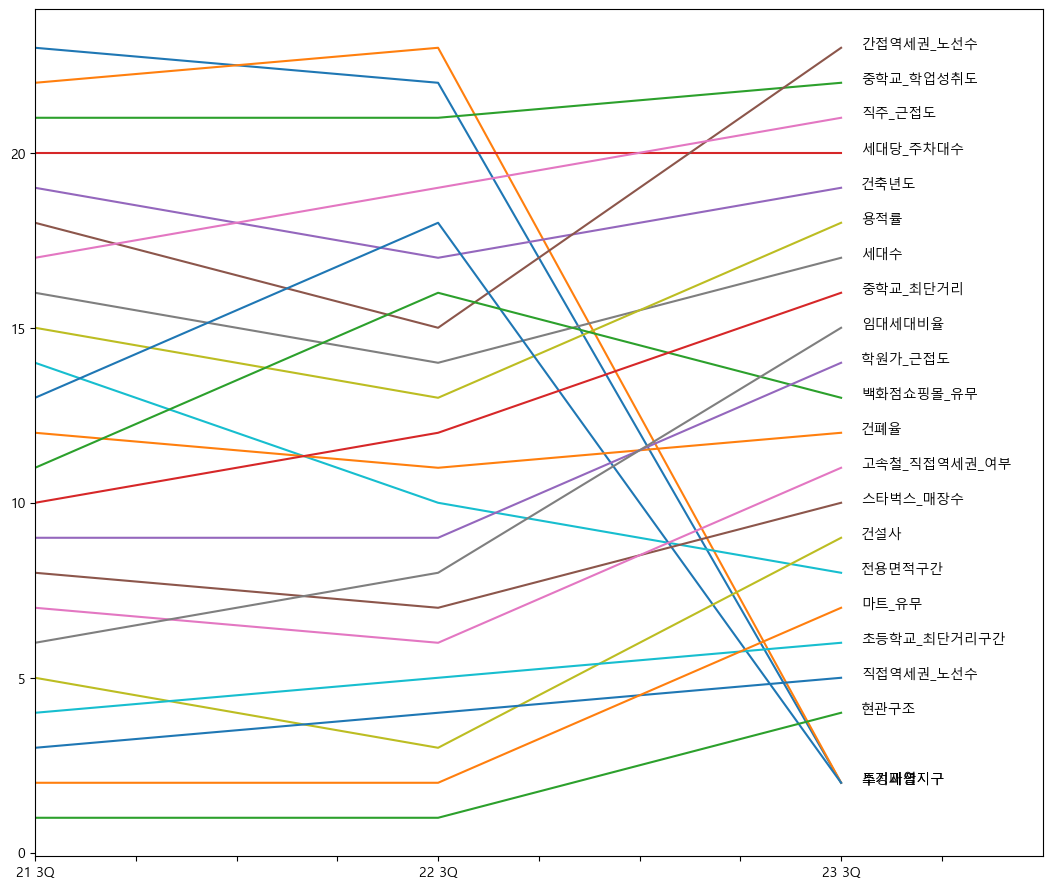

In [ ]:
t2 = t.copy()
t2[q]=t2[q].rank()
fig,ax=plt.subplots(figsize=(13,11))
t2.set_index('feature').T.plot(ax=ax, legend=False)
for i in range(t2.shape[0]): ax.annotate(t2['feature'][i],xy=(2.05, t2['23 3Q'][i]))
ax.set_xlim(0,2.5)
;

### 아파트 단지 정보 데이터 - 데이터 분포

In [ ]:
total_data = pd.read_csv('total_data.csv', encoding='cp949')

In [ ]:
total_data.columns

Index(['아파트명', '법정동주소', '도로명주소', 'latitude', 'longitude', '세대수', '최고층', '용적률',
       '건폐율', '전용율', '방수', '욕실수', '현관구조', '초등학교_학군정보', '초등학교_설립정보', '건설사',
       '임대세대비율', '세대당_주차대수', '초등학교_학생수', '전용면적구간', '직접역세권_노선수', '직접역세권_노선',
       '직접역세권_역', '간접역세권_노선수', '간접역세권_노선', '간접역세권_역', '고속철_직접역세권_여부',
       '고속철_직접역세권_역명', '고속철_간접역세권_역명', '중학교명', '중학교_학업성취도', '중학교_졸업자수',
       '중학교_최단거리', '초등학교명', '초등학교_도로명주소', '초등학교_최단거리', '초등학교_최단거리구간',
       '스타벅스_매장수', '스타벅스_매장이름', '직주_근접도', '직주_이름', '직주_최단거리', '학원가_근접도',
       '최근접학원가', '학원가_최단거리', '건축년도', '분기', '전용면적합', '거래금액합', '거래량',
       '단위면적당거래금액', '평균거래금액', '거래존재여부', '결측치연속', '조정대상지구', '투기지역', '투기과열지구',
       '백화점쇼핑몰_유무', '백화점쇼핑몰_매장이름', '백화점쇼핑몰_최단거리', '마트_유무', '마트_매장이름',
       '마트_최단거리'],
      dtype='object')

In [ ]:
total_data[total_data['조정대상지구']==1]['분기'].unique()

array(['2023 1Q'], dtype=object)

In [ ]:
total_data['분기'].unique()

array(['2016 1Q', '2016 2Q', '2016 3Q', '2016 4Q', '2017 1Q', '2017 2Q',
       '2017 3Q', '2017 4Q', '2018 1Q', '2018 2Q', '2018 3Q', '2018 4Q',
       '2019 1Q', '2019 2Q', '2019 3Q', '2019 4Q', '2020 1Q', '2020 2Q',
       '2020 3Q', '2020 4Q', '2021 1Q', '2021 2Q', '2021 3Q', '2021 4Q',
       '2022 1Q', '2022 2Q', '2022 3Q', '2022 4Q', '2023 1Q', '2023 2Q',
       '2023 3Q'], dtype=object)

In [ ]:
target_data = total_data[total_data['분기']>='2017 3Q']

In [ ]:
data = total_data.drop('분기',axis=1).drop_duplicates(['도로명주소','전용면적구간'])

In [ ]:
total_data.columns

Index(['아파트명', '법정동주소', '도로명주소', 'latitude', 'longitude', '세대수', '최고층', '용적률',
       '건폐율', '전용율', '방수', '욕실수', '현관구조', '초등학교_학군정보', '초등학교_설립정보', '건설사',
       '임대세대비율', '세대당_주차대수', '초등학교_학생수', '전용면적구간', '직접역세권_노선수', '직접역세권_노선',
       '직접역세권_역', '간접역세권_노선수', '간접역세권_노선', '간접역세권_역', '고속철_직접역세권_여부',
       '고속철_직접역세권_역명', '고속철_간접역세권_역명', '중학교명', '중학교_학업성취도', '중학교_졸업자수',
       '중학교_최단거리', '초등학교명', '초등학교_도로명주소', '초등학교_최단거리', '초등학교_최단거리구간',
       '스타벅스_매장수', '스타벅스_매장이름', '직주_근접도', '직주_이름', '직주_최단거리', '학원가_근접도',
       '최근접학원가', '학원가_최단거리', '건축년도', '분기', '전용면적합', '거래금액합', '거래량',
       '단위면적당거래금액', '평균거래금액', '거래존재여부', '결측치연속', '조정대상지구', '투기지역', '투기과열지구',
       '백화점쇼핑몰_유무', '백화점쇼핑몰_매장이름', '백화점쇼핑몰_최단거리', '마트_유무', '마트_매장이름',
       '마트_최단거리'],
      dtype='object')

### 시계열 결측치

''

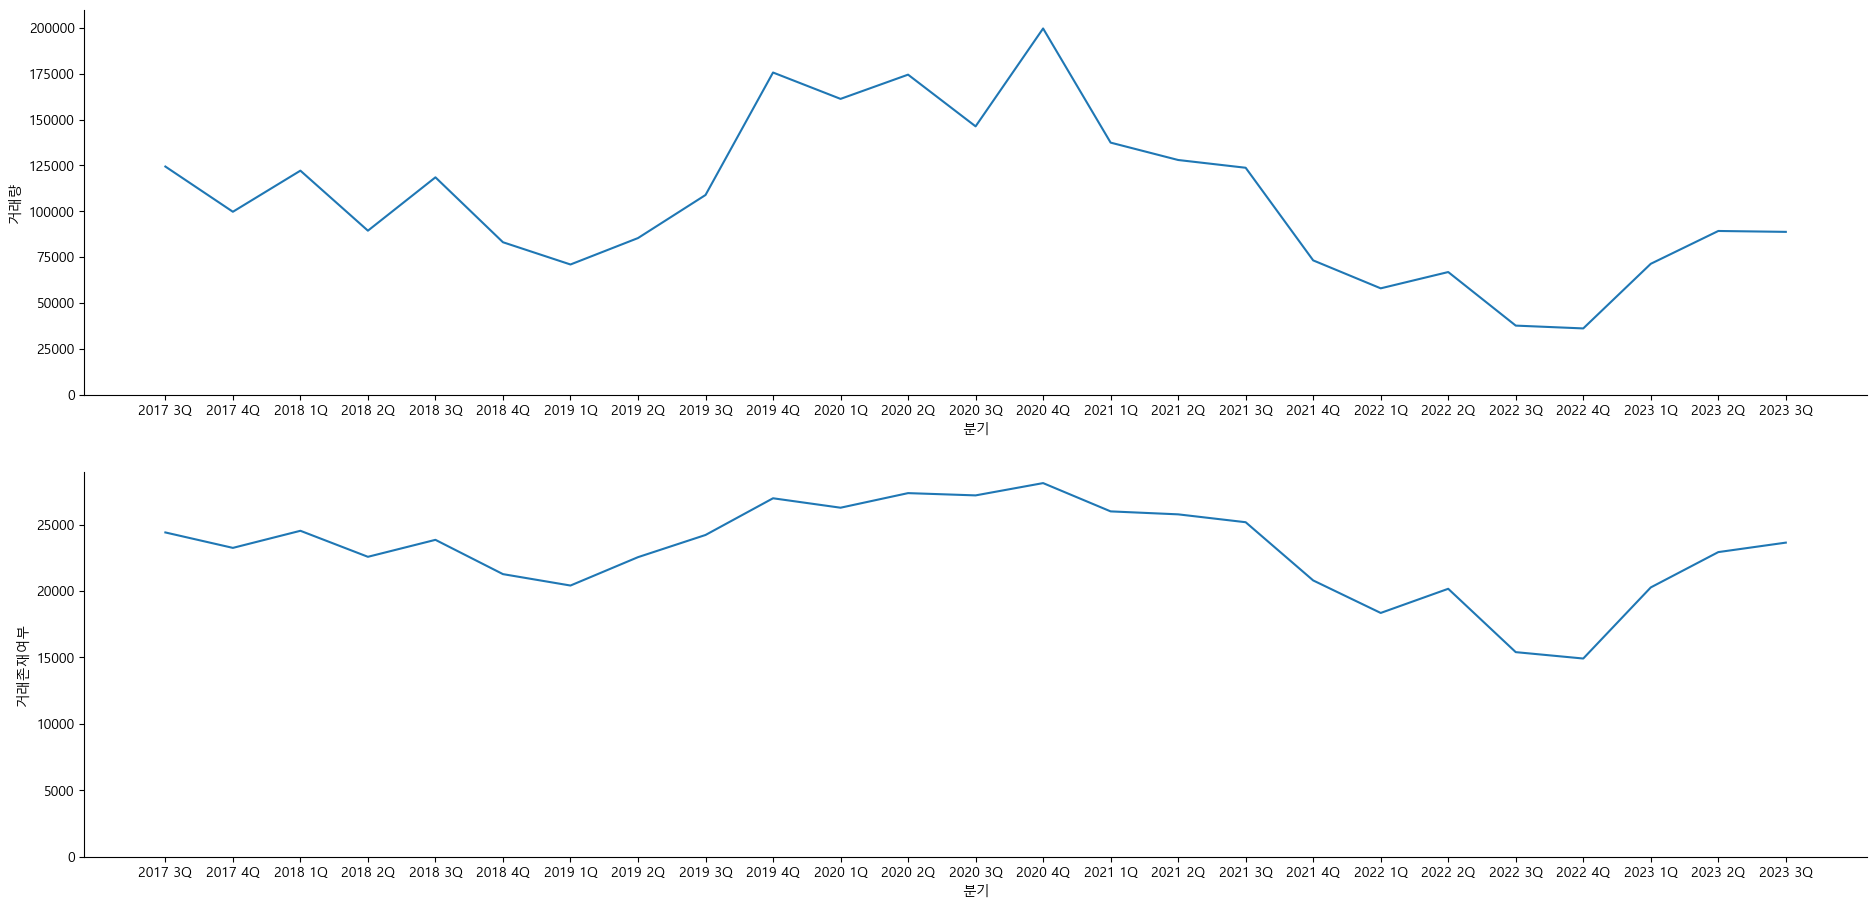

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(23,11))
for i,c in enumerate(['거래량','거래존재여부']):
    sns.lineplot(target_data.groupby('분기')[c].agg('sum'), ax=axes[i])
    axes[i].set_ylim((0,[210000,29000][i]))
    for s in ['top','right']: axes[i].spines[s].set_visible(False)
;

In [ ]:
table = target_data.groupby(['아파트명','도로명주소'])['결측치연속'].agg(['max'])

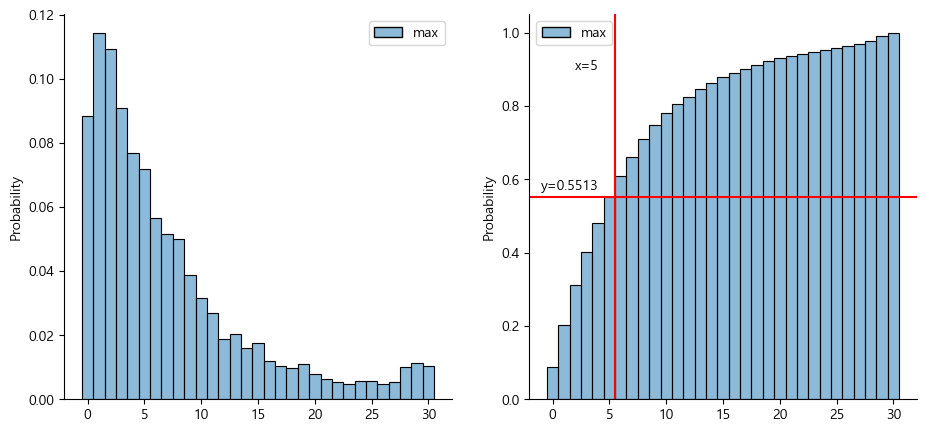

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(11,5))
sns.histplot(table, stat='probability', binwidth=1, binrange=(-0.5,30.5), ax=axes[0])
sns.histplot(table, stat='probability', binwidth=1, binrange=(-0.5,30.5), ax=axes[1], cumulative=True)

for i in range(2):
    for s in ['top','right']: axes[i].spines[s].set_visible(False)

ax = axes[1]
thresh = 5
height = np.round(ax.patches[thresh].get_height(),4)

ax.axvline(thresh+.5, color='r')
ax.annotate(text=f'x={thresh}', xy=(thresh-3, 0.9));
ax.axhline(height, color='r')
ax.annotate(text=f'y={height}', xy=(-1, height+.02));

In [ ]:
tmp = target_data[target_data['결측치연속']>=9]
names = (tmp['도로명주소']+tmp['전용면적구간'].astype(str)).unique()

table = target_data[~(target_data['도로명주소']+target_data['전용면적구간'].astype(str)).isin(names)].pivot_table(index='결측치연속', columns='분기', values='도로명주소', aggfunc='count')
table = table.sort_index(ascending=False) / table.sum(axis=0)[0]

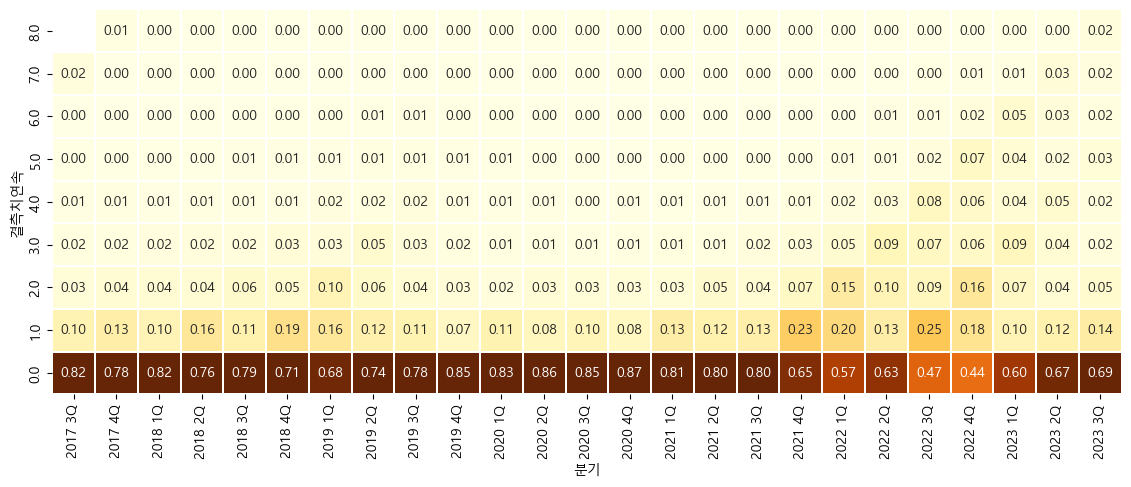

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(17,5))
sns.heatmap(table, vmin=0, vmax=.7, cmap='YlOrBr', cbar=False, square=True, linewidth=.1, annot=True, fmt='.2f', ax=ax);

In [ ]:
target_data['시도']=target_data['도로명주소'].apply(lambda x: x.split()[0])

In [ ]:
table = target_data.pivot_table(index='시도', columns='분기', values='거래량', aggfunc='sum')
table = table / table.sum(axis=0)

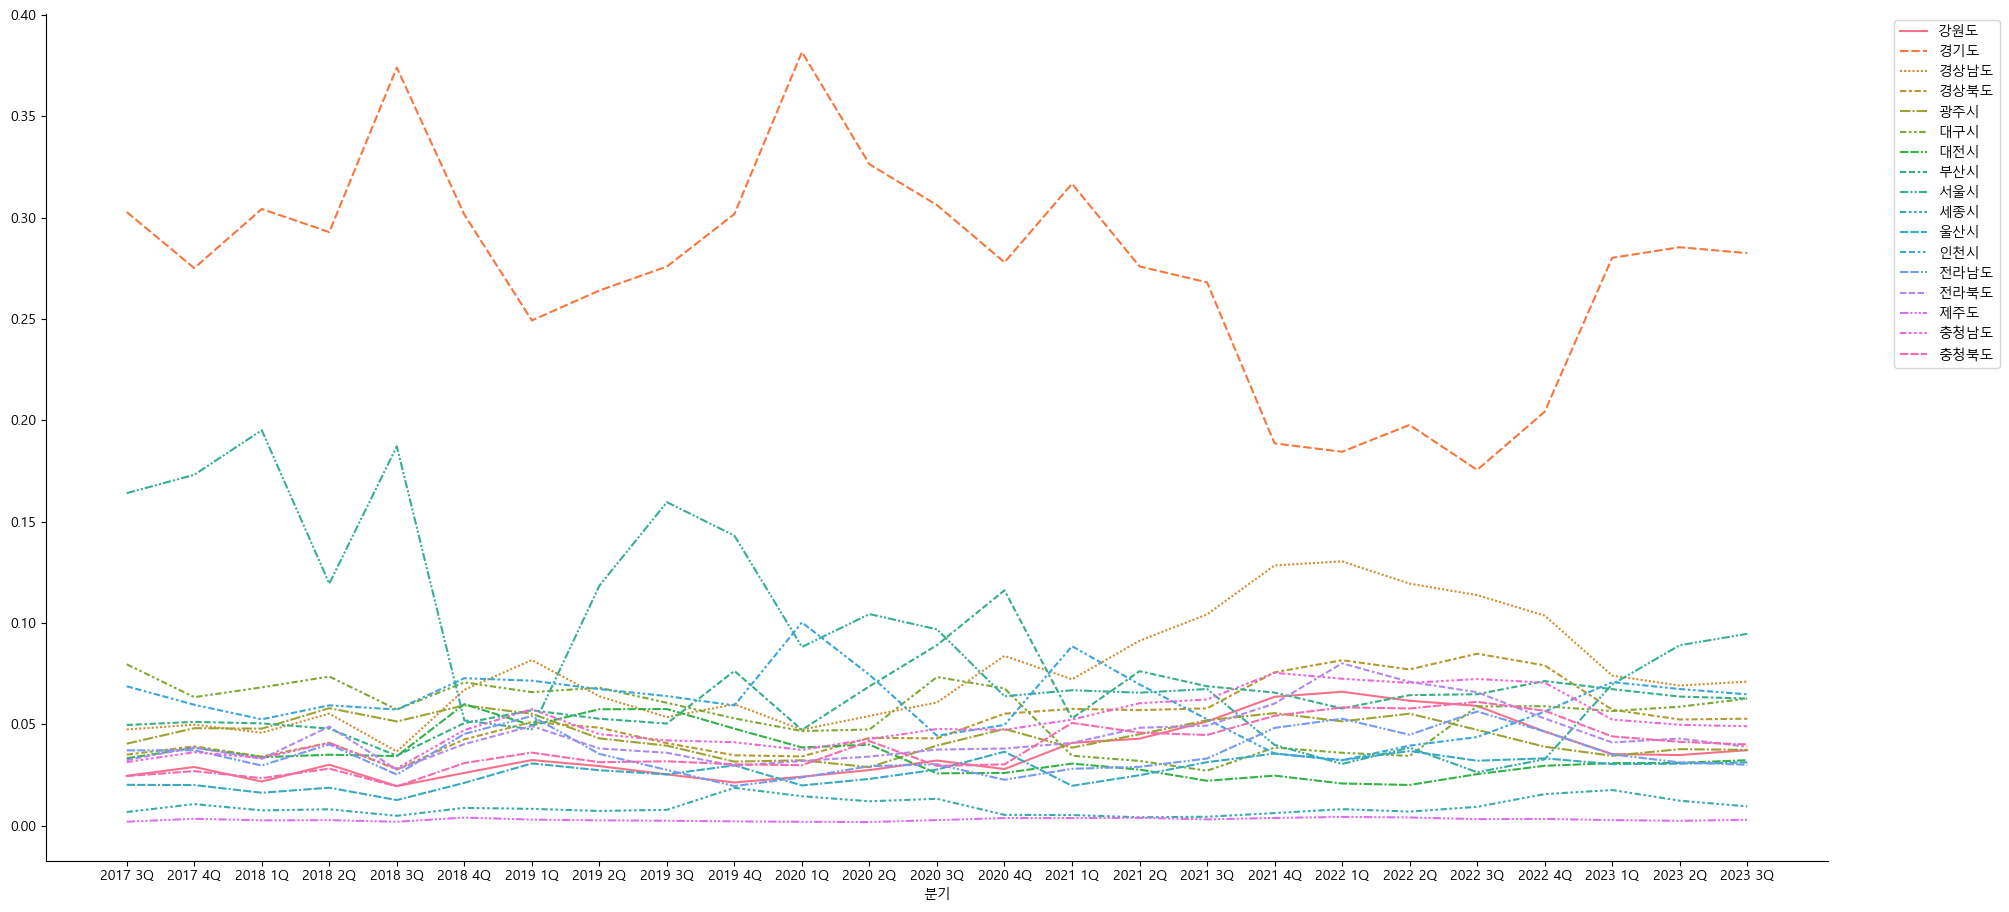

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,11))
sns.lineplot(table.T, ax=ax)
for s in ['top','right']: ax.spines[s].set_visible(False)
ax.legend(bbox_to_anchor=(1.1,1));

In [ ]:
table2 = table / np.hstack([table.values[:,0].reshape(-1,1), table.values[:,:-1]])

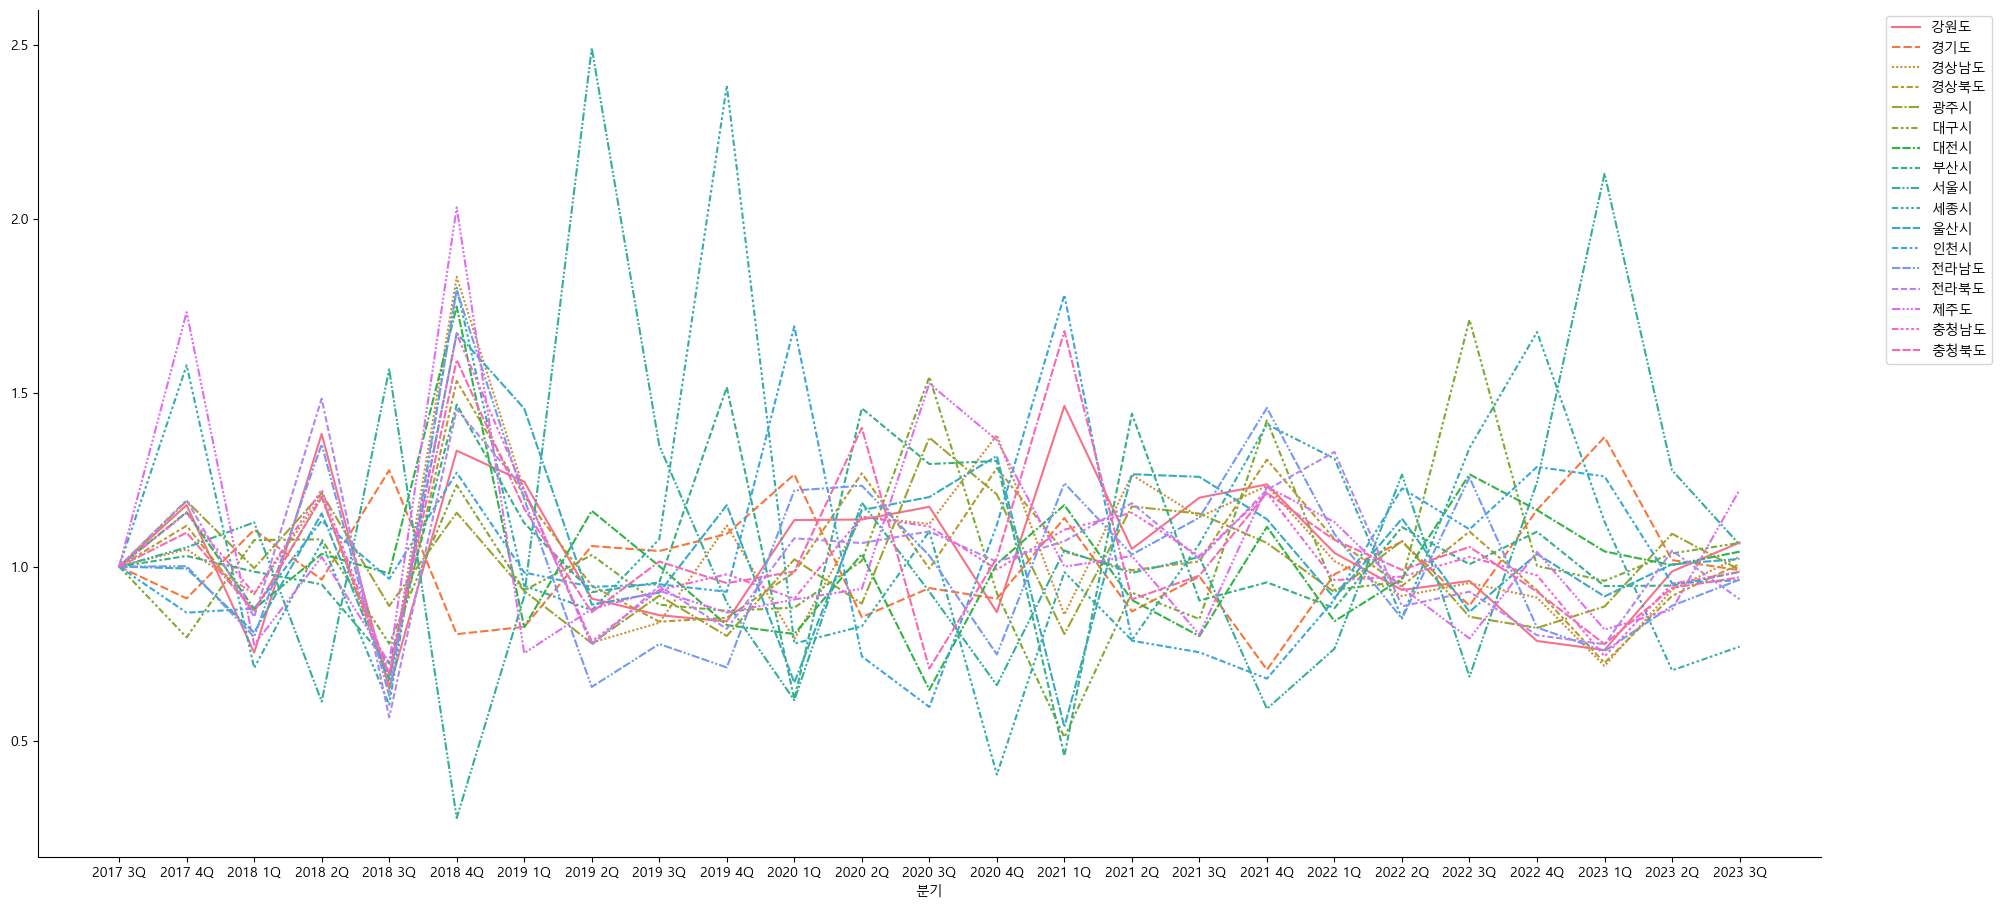

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,11))
sns.lineplot(table2.T, ax=ax)
for s in ['top','right']: ax.spines[s].set_visible(False)
ax.legend(bbox_to_anchor=(1.1,1));

In [ ]:
table3 = table / table.values[:,0].reshape(-1,1)

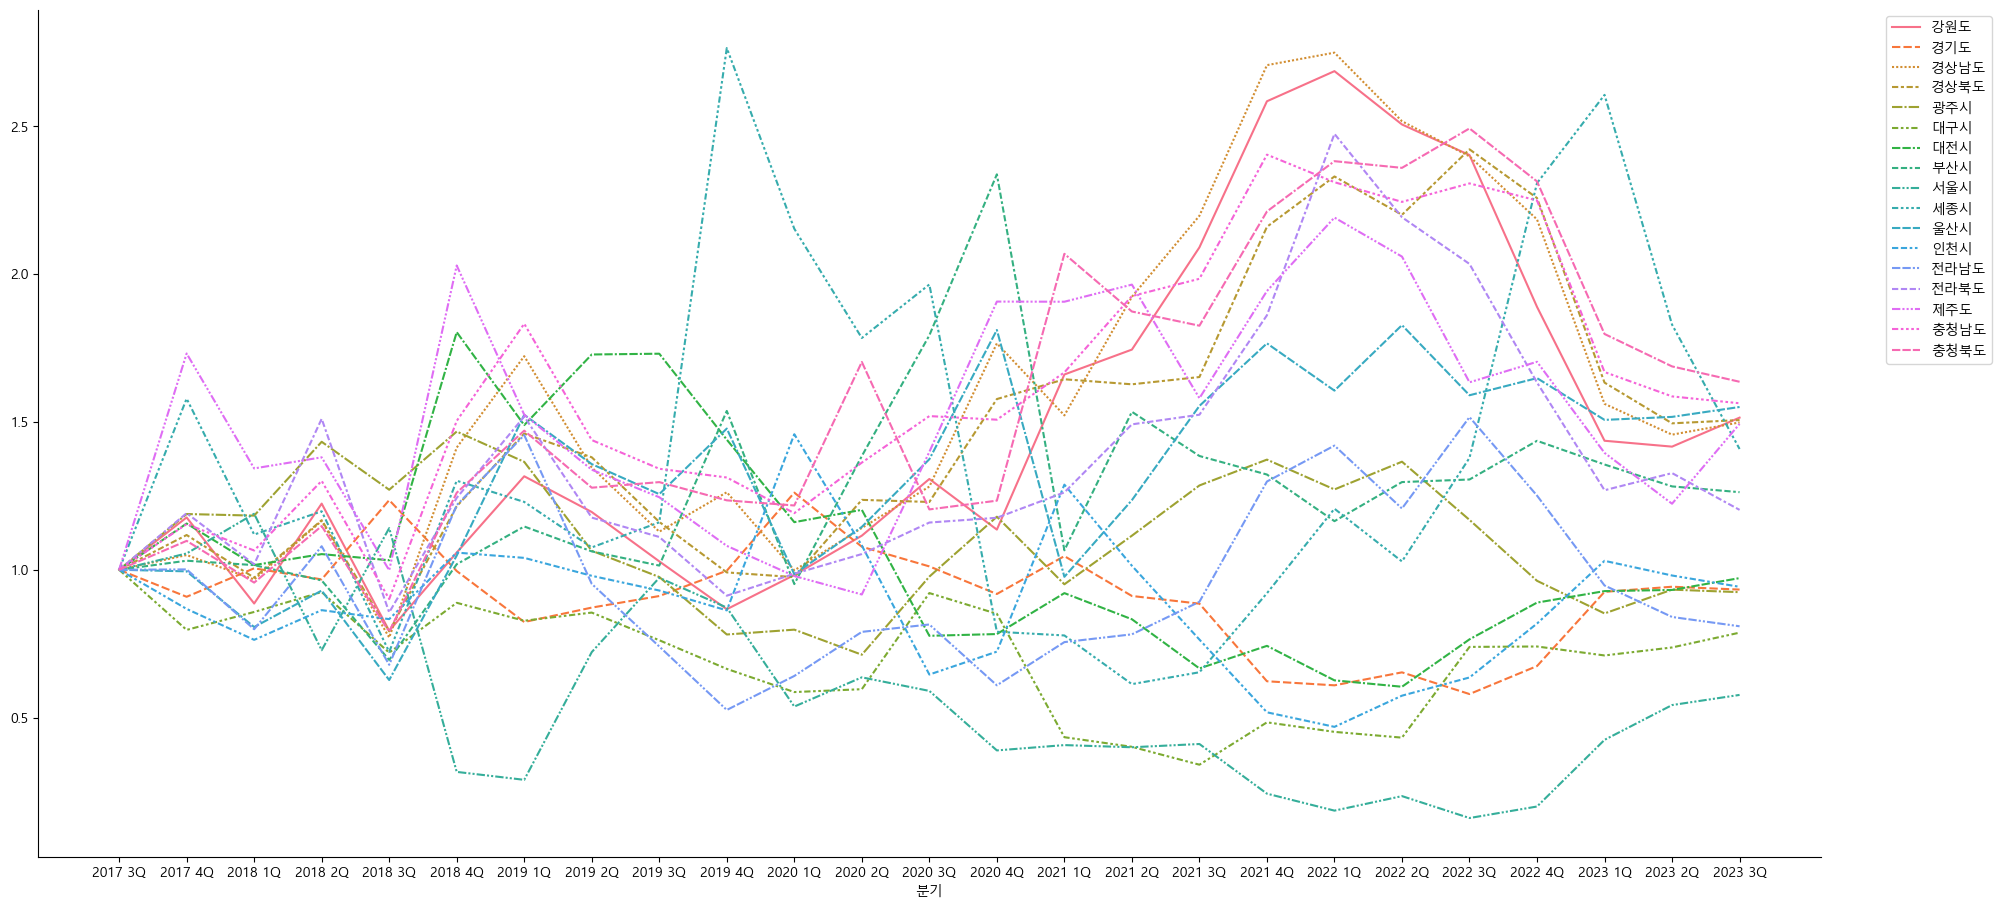

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,11))
sns.lineplot(table3.T, ax=ax)
for s in ['top','right']: ax.spines[s].set_visible(False)
ax.legend(bbox_to_anchor=(1.1,1));

#### 아파트 구조 - 면적

- 방 수, 욕실 수
- 실거래 데이터의 건축년도와 결합시켜서 추가적인 비교 가능

In [ ]:
apt_data = pd.read_csv('data/apt_info_data.csv', encoding='cp949')

In [ ]:
for col in ['방수','욕실수']: apt_data[col] = apt_data[col].replace('-',0).astype(int)

In [ ]:
def pivot(data, columns, index, values, aggfunc, axis=0):
    return data.pivot_table(
        index=index, columns=columns, values=values, aggfunc=aggfunc,
        ).fillna(0).astype(int).style.background_gradient(axis=axis)

In [ ]:
pivot(apt_data, '전용면적구간', '방수', '도로명주소', 'count')

# 전용면적구간별로 방수는 대다수 3개로 설계함을 확인 최고 평수인 4구간을 제외하고 방3개의 비율이 제일 높음
#

전용면적구간,0,1,2,3,4
방수,,,,,
0,1,0,0,0,0
1,336,13,4,3,1
2,4021,499,73,19,12
3,6857,4660,13662,1663,1091
4,5,30,421,823,5496
5,1,0,0,5,108
6,0,0,0,0,5
7,0,0,0,0,2


In [ ]:
pivot(apt_data, '방수', '욕실수', '도로명주소', 'count')

# 방수 2개 이하는 욕실수 1개 2개 초과는 2개의 욕실수가 대다수의 분포를 이룸
#

방수,0,1,2,3,4,5,6,7
욕실수,,,,,,,,
0,1,0,1,2,0,0,0,0
1,0,353,4383,7205,30,0,0,0
2,0,4,238,20658,6641,90,2,0
3,0,0,2,67,101,21,2,0
4,0,0,0,1,3,3,1,2
